## K-NEAREST NEIGHBOURS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#load the Dataset
df=pd.read_csv('Zoo.csv')

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## visualizations

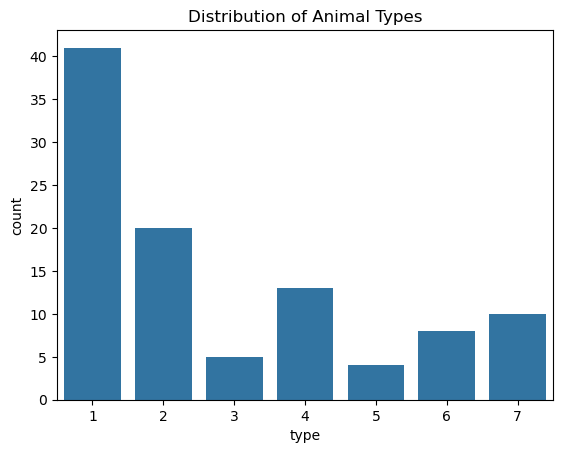

In [10]:
# Visualize the distribution of animal types
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

In [11]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [12]:
#drop the 'Animal name' column as it is not useful for prediction
df.drop('animal name', axis=1, inplace=True)

In [13]:
#Encode the target variables 'Type' if it is categorical
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [14]:
#split the dataset into features and target data
x = df.drop('type',axis=1)
y = df['type']

In [15]:
#Split the dataset (80% training, 20% testing)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 16)
(31, 16)
(70,)
(31,)


In [17]:
# Implement K-Nearest Neighbors (KNN)
k = 5  # Choosing K value
knn = KNeighborsClassifier(n_neighbors=k)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred=knn.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8709677419354839

In [21]:
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       0.83      1.00      0.91         5
           6       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31



In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[14  0  0  1  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


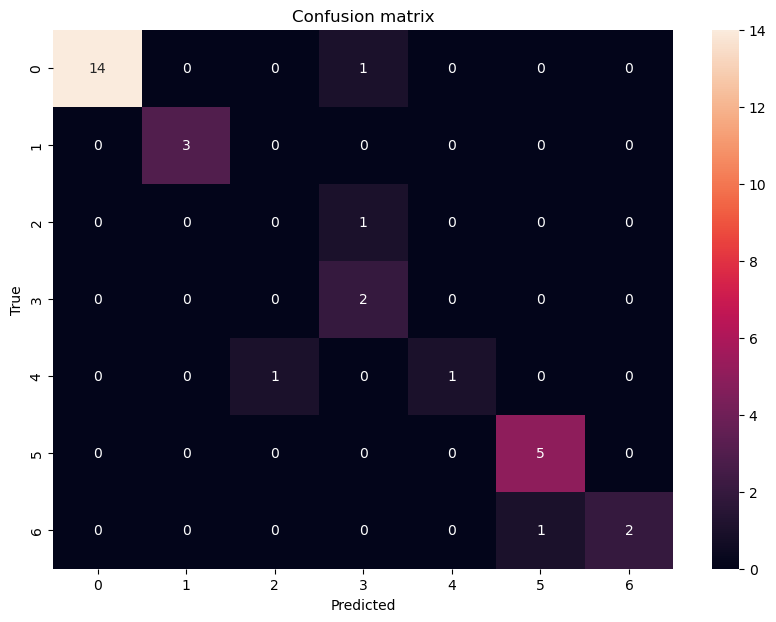

In [23]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

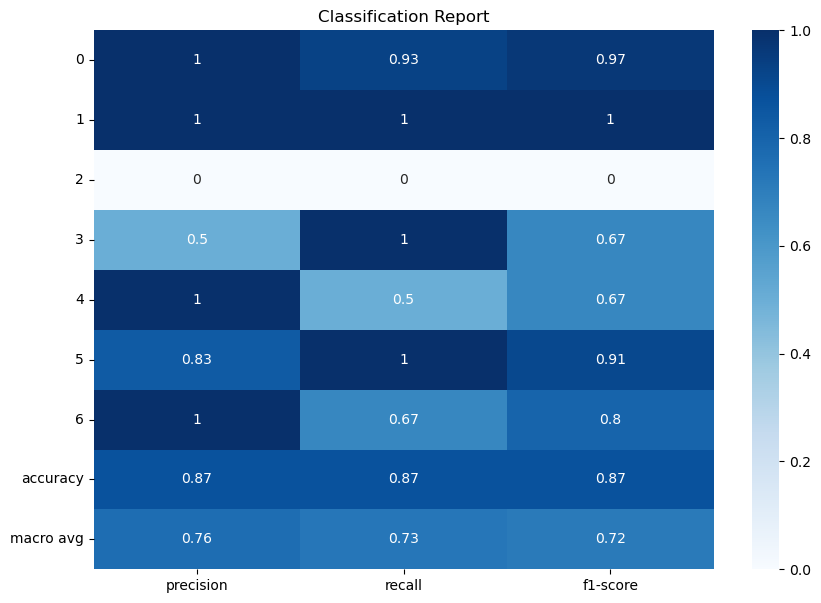

In [24]:
report_data = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()
plt.figure(figsize=(10,7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

## Visualize the decision boundaries of the classifier.

In [29]:
# For visualization, we will use only two features
x_vis = x[['hair', 'legs']]
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(x_vis, y, test_size=0.2, random_state=42)

In [31]:
knn.fit(x_train_vis, y_train_vis)

KNeighborsClassifier()

In [39]:
# Create a contour plot of the decision boundaries
x_min, x_max = x_vis['hair'].min() - 1, X_vis['hair'].max() + 1
y_min, y_max = x_vis['legs'].min() - 1, X_vis['legs'].max() + 1

In [43]:
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

In [45]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


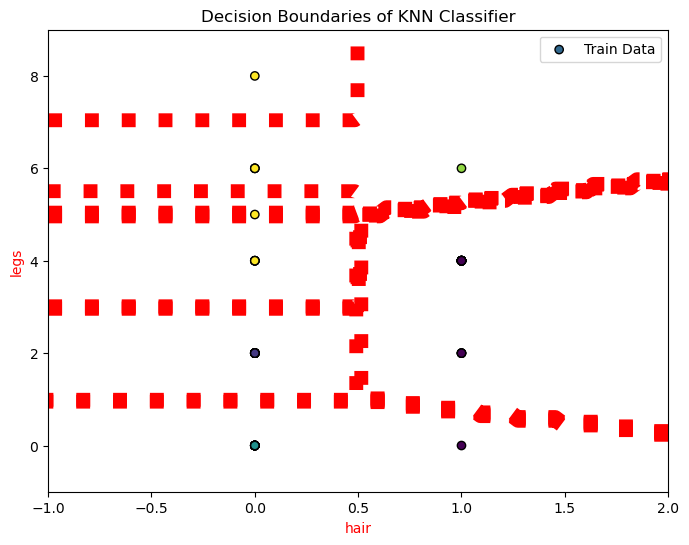

In [65]:
plt.figure(figsize=(8, 6))

# Scatter plot of training data
plt.scatter(x_train['hair'], x_train['legs'], c=y_train, edgecolor='k', marker='o', label='Train Data')

# Decision boundary contour
plt.contour(xx, yy, Z, colors='red', linestyles=':', linewidths=10)

# Titles and labels
plt.title('Decision Boundaries of KNN Classifier')
plt.xlabel('hair', color='red')
plt.ylabel('legs', color='red')

plt.legend()
plt.show()